In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
d = pd.read_csv("F:\Salary_Data.csv")

In [13]:
x=d.YearsExperience
y=d.Salary

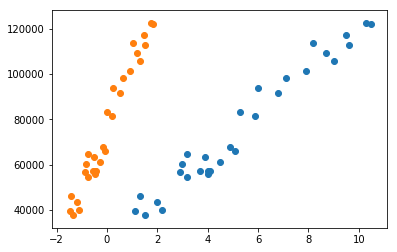

In [18]:
plt.scatter(x,y)
#pre processing data(normalizing)
X=(x-x.mean())/x.std()
Y=y
plt.scatter(X,Y)
plt.show()


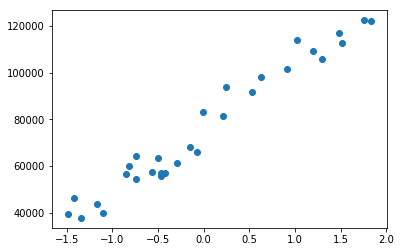

In [19]:
#check no line for change
plt.scatter(X,Y)

In [61]:
#Gradient algo
def hypothesis(X,theta):
    return theta[0]+theta[1]*X

def error(X,Y,theta):
    m = X.shape[0]
    error=0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
    
    return error

#learning

def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
     
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] += (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
   
    return grad

def gradientDescend(X,Y,learning_rate=0.001):
    theta = np.zeros((2,))
    
    itr=0
    max_itr=1000
    error_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
        
        itr += 1
        
    return theta,error_list
        
        

In [62]:
final_theta,Error_list = gradientDescend(X,Y)

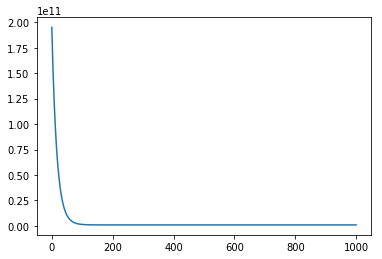

In [63]:
plt.plot(Error_list)

In [64]:
print(final_theta)

[76003.         26817.93616241]


In [65]:
#generate data for test

xtest = np.linspace(-1.5,2,5)
print(xtest)

[-1.5   -0.625  0.25   1.125  2.   ]


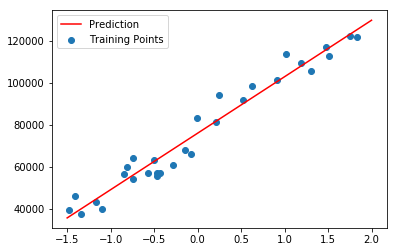

In [67]:
plt.scatter(X,Y,label='Training Points')
plt.plot(xtest,hypothesis(xtest,final_theta),color='red',label='Prediction')
plt.legend()
plt.show()